In [12]:
import numpy as np
import pandas as pd
from scipy import stats, optimize, integrate
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv("NED_DATA - Sheet2.csv")

In [14]:
df.info

<bound method DataFrame.info of                     Galaxy Name      m-M    err  D (Mpc)    Method  \
0                    GRB 021004  46.48**    1.8     4331       GRB   
1                    GRB 021004   46.45*   0.52     5873       GRB   
2                    GRB 050824   43.35*   1.29     2556       GRB   
3                      CDFa C01  45.77**   1.58     2464    HII LF   
4                    GRB 050904   49.34*   0.53    10122       GRB   
..                          ...      ...    ...      ...       ...   
115              MS 0737.9+7441   41.04*  . . .     1228  BL Lac M   
116  H-ZSNS J074855.70+100606.3   42.02*   0.17     1781      SNIa   
117  H-ZSNS J075013.53+101710.4   40.89*    0.3     1079      SNIa   
118  H-ZSNS J075031.24+102107.3   43.99*   0.38     3244      SNIa   
119  H-ZSNS J075035.90+095814.2   43.90*    0.3     3202      SNIa   

                 REFCODE                  Notes       RA  Dec   GLON  GLAT  \
0    2006astro.ph..9262M    z = 2.332, h = 0.73  0:26:55  NaN  114.9 -43.6   
1    2006astro.ph.12285S              z = 2.332  0:26:55  NaN  114.9 -43.6   
2    2006astro.ph.12285S               z = 0.83  0:48:56  NaN  122.2 -40.3   
3    2005MNRAS.356.1117S   z = 3.1100, h = 0.71  0:53:35  NaN  123.8 -50.4   
4    2006astro.ph.12285S                  z6.29  0:54:51  NaN  124.2 -48.8   
..                   ...                    ...      ...  ...    ...   ...   
115  2005ApJ...635..173S            z = 0.31500  7:44:05  NaN  140.3  29.6   
116  2004ApJ...607..665R   SN 2002ab, z = 0.423  7:48:56  NaN  210.3  17.3   
117  2004ApJ...607..665R  SN 2001iv, z = 0.3965  7:50:14  NaN  210.2  17.7   
118  2004ApJ...607..665R   SN 2001kd, z = 0.936  7:50:31  NaN  210.2  17.8   
119  2004ApJ...607..665R   SN 2001hu, z = 0.882  7:50:36  NaN  210.6  17.6   

    V helio (z) (km/s)  Unnamed: 12  
0               250249          NaN  
1               250249          NaN  
2               161922          NaN  
3               266281          NaN  
4               288711          NaN  
..                 ...          ...  
115              80102          NaN  
116             101578          NaN  
117              96558          NaN  
118             173513          NaN  
119             167781          NaN  

[120 rows x 13 columns]>

In [15]:
distance= df["D (Mpc)"]
print(distance)

0       4331
1       5873
2       2556
3       2464
4      10122
       ...  
115     1228
116     1781
117     1079
118     3244
119     3202
Name: D (Mpc), Length: 120, dtype: int64


In [16]:
velocity= df["V helio (z) (km/s)"]
print(velocity)

0      250249
1      250249
2      161922
3      266281
4      288711
        ...  
115     80102
116    101578
117     96558
118    173513
119    167781
Name: V helio (z) (km/s), Length: 120, dtype: object


In [17]:
dist_col = "D (Mpc)"
vel_col = "V helio (z) (km/s)"

Total galaxies: 119


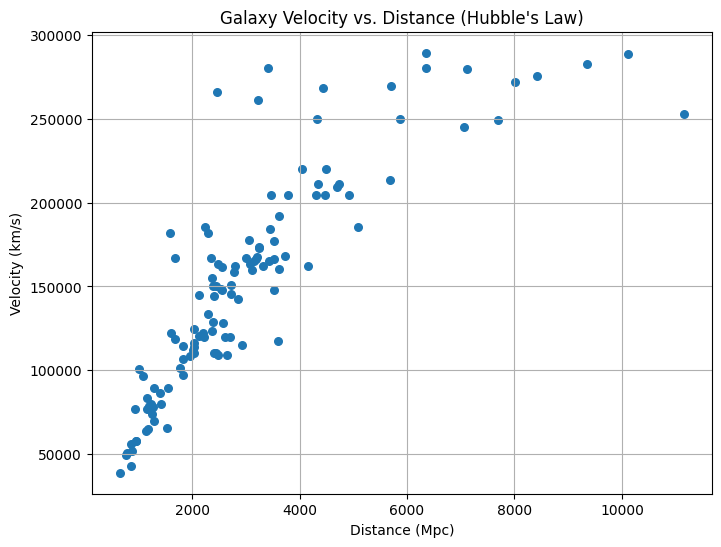

In [18]:
df[dist_col] = pd.to_numeric(df[dist_col], errors="coerce")
df[vel_col] = pd.to_numeric(df[vel_col], errors="coerce")

# Drop rows with missing values
df_clean = df.dropna(subset=[dist_col, vel_col])

print("Total galaxies:", len(df_clean))

# Plot without filtering
plt.figure(figsize=(8, 6))
plt.scatter(df_clean[dist_col], df_clean[vel_col], s=30)

plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Galaxy Velocity vs. Distance (Hubble's Law)")
plt.grid(True)
plt.show()

Best-fit H0: 27.47 ± 1.63 km/s/Mpc
Intercept: 68577.10 ± 5921.00 km/s


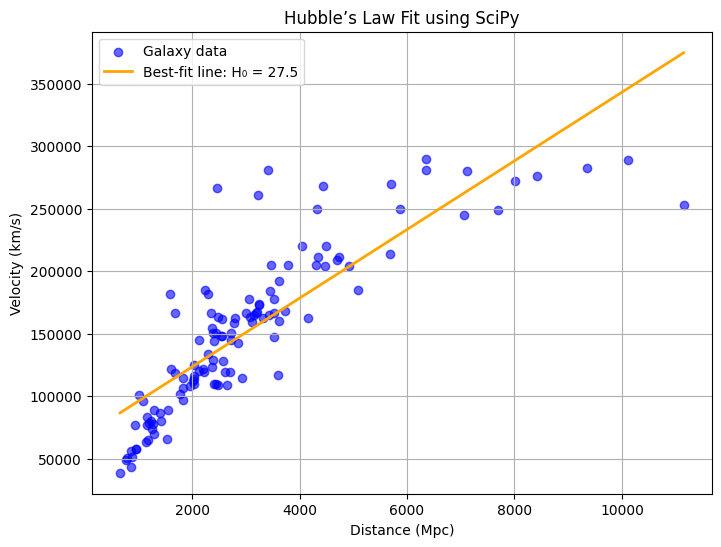

In [26]:
df[dist_col] = pd.to_numeric(df[dist_col], errors="coerce")
df[vel_col] = pd.to_numeric(df[vel_col], errors="coerce")

#remove invalid rows
df_clean = df.dropna(subset=[dist_col, vel_col])

# Values for curve fit
d = df_clean[dist_col].values
v = df_clean[vel_col].values

#Model
def hubble_law(distance, H0, intercept):
    return H0 * distance + intercept

# fit
popt, pcov = optimize.curve_fit(hubble_law, d, v)

H0_fit, intercept_fit = popt
H0_uncertainty, intercept_uncertainty = np.sqrt(np.diag(pcov))

print(f"Best-fit H0: {H0_fit:.2f} ± {H0_uncertainty:.2f} km/s/Mpc")
print(f"Intercept: {intercept_fit:.2f} ± {intercept_uncertainty:.2f} km/s")

#plotting
plt.figure(figsize=(8, 6))
plt.scatter(d, v, color="blue", alpha=0.6, label="Galaxy data")

# Sorted distances so the line plots cleanly
d_sorted = np.sort(d)
plt.plot(d_sorted, hubble_law(d_sorted, *popt),
         color="orange", linewidth=2,
         label=f"Best-fit line: H₀ = {H0_fit:.1f}")

plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Hubble’s Law Fit using SciPy")
plt.legend()
plt.grid(True)
plt.show()

Best-fit H0: 27.47 ± 1.63 km/s/Mpc
Intercept: 68577.10 ± 5921.00 km/s
Best-fit H0: 43.31 ± 1.29 km/s/Mpc


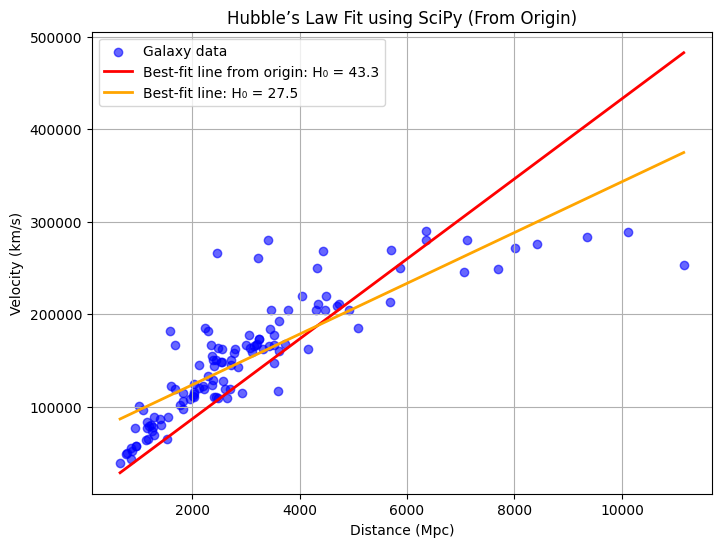

In [37]:
df[dist_col] = pd.to_numeric(df[dist_col], errors="coerce")
df[vel_col] = pd.to_numeric(df[vel_col], errors="coerce")

#remove invalid rows
df_clean = df.dropna(subset=[dist_col, vel_col])

# Values for curve fit
d = df_clean[dist_col].values
v = df_clean[vel_col].values

#Model
def hubble_law(distance, H0, intercept):
    return H0 * distance + intercept

# fit
popt, pcov = optimize.curve_fit(hubble_law, d, v)

H0_fit, intercept_fit = popt
H0_uncertainty, intercept_uncertainty = np.sqrt(np.diag(pcov))

print(f"Best-fit H0: {H0_fit:.2f} ± {H0_uncertainty:.2f} km/s/Mpc")
print(f"Intercept: {intercept_fit:.2f} ± {intercept_uncertainty:.2f} km/s")

#Model from origin
def hubble_no_intercept(distance, H0):
    return H0 * distance

# fit from origin
popt_origin, pcov_origin = optimize.curve_fit(hubble_no_intercept, d, v)

H0_fit_origin = popt_origin[0]
H0_uncertainty_origin = np.sqrt(np.diag(pcov_origin))[0]

print(f"Best-fit H0: {H0_fit_origin:.2f} ± {H0_uncertainty_origin:.2f} km/s/Mpc")

#plotting
plt.figure(figsize=(8, 6))
plt.scatter(d, v, color="blue", alpha=0.6, label="Galaxy data")

# Sorted distances so the line plots cleanly
d_sorted = np.sort(d)
plt.plot(d_sorted, hubble_no_intercept(d_sorted, *popt_origin),
         color="red", linewidth=2,
         label=f"Best-fit line from origin: H₀ = {H0_fit_origin:.1f}")
plt.plot(d_sorted, hubble_law(d_sorted, *popt),
         color="orange", linewidth=2,
         label=f"Best-fit line: H₀ = {H0_fit:.1f}")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Hubble’s Law Fit using SciPy (From Origin)")
plt.legend()
plt.grid(True)
plt.show()

Best-fit H0: 27.47 ± 1.63 km/s/Mpc
Intercept: 68577.10 ± 5921.00 km/s
Best-fit H0 from origin: 43.31 ± 1.29 km/s/Mpc
Theoretical H0: 70 ± 4 km/s/Mpc


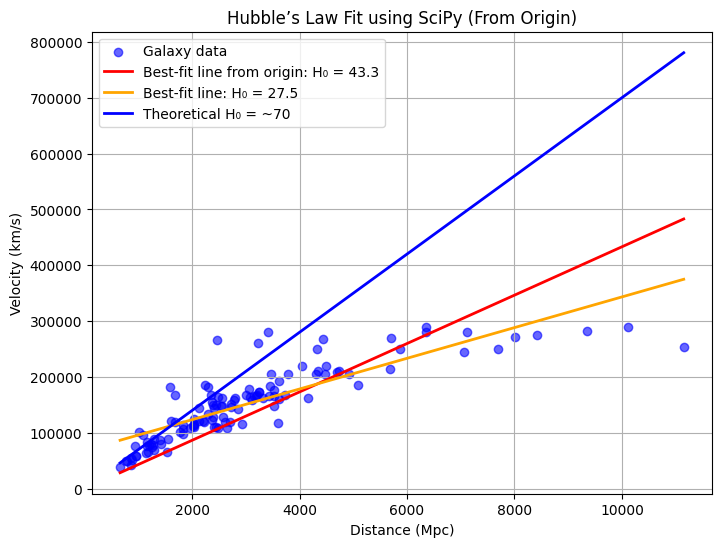

In [41]:
df[dist_col] = pd.to_numeric(df[dist_col], errors="coerce")
df[vel_col] = pd.to_numeric(df[vel_col], errors="coerce")

#remove invalid rows
df_clean = df.dropna(subset=[dist_col, vel_col])

# Values for curve fit
d = df_clean[dist_col].values
v = df_clean[vel_col].values

#Model
def hubble_modeled(distance, H0, intercept):
    return H0 * distance + intercept

# fit
popt, pcov = optimize.curve_fit(hubble_modeled, d, v)

H0_fit, intercept_fit = popt
H0_uncertainty, intercept_uncertainty = np.sqrt(np.diag(pcov))

print(f"Best-fit H0: {H0_fit:.2f} ± {H0_uncertainty:.2f} km/s/Mpc")
print(f"Intercept: {intercept_fit:.2f} ± {intercept_uncertainty:.2f} km/s")

#Model from origin
def hubble_no_intercept(distance, H0):
    return H0 * distance

# fit from origin
popt_origin, pcov_origin = optimize.curve_fit(hubble_no_intercept, d, v)

H0_fit_origin = popt_origin[0]
H0_uncertainty_origin = np.sqrt(np.diag(pcov_origin))[0]

print(f"Best-fit H0 from origin: {H0_fit_origin:.2f} ± {H0_uncertainty_origin:.2f} km/s/Mpc")

# Theoretical Model
def hubble_theoretical(distance):
    return 70 * distance

print(f"Theoretical H0: {70} ± {4} km/s/Mpc")

#plotting
plt.figure(figsize=(8, 6))
plt.scatter(d, v, color="blue", alpha=0.6, label="Galaxy data")

# Sorted distances so the line plots cleanly
d_sorted = np.sort(d)
plt.plot(d_sorted, hubble_no_intercept(d_sorted, *popt_origin),
         color="red", linewidth=2,
         label=f"Best-fit line from origin: H₀ = {H0_fit_origin:.1f}") # red line is from origin
plt.plot(d_sorted, hubble_modeled(d_sorted, *popt),
         color="orange", linewidth=2,
         label=f"Best-fit line: H₀ = {H0_fit:.1f}") # orange is fitted to modeled intercept
plt.plot(d_sorted, hubble_theoretical(d_sorted,),
         color="blue", linewidth=2,
         label=f"Theoretical H₀ = ~{70}") # blue is rough estimate of theoretical hubble model
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Hubble’s Law Fit using SciPy (From Origin)")
plt.legend()
plt.grid(True)
plt.show()